In [23]:
from langgraph.graph import StateGraph, START ,END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage,HumanMessage
from langchain_ollama import ChatOllama
from langgraph.checkpoint.memory import MemorySaver


In [24]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):   
    messages : Annotated[list[BaseMessage], add_messages]

In [25]:
model =  ChatOllama(model="gemma3:4b")

In [26]:
def chat_node(state:ChatState):
    messages = state['messages']

    response = model.invoke(messages)

    return {'messages': [response]}


In [27]:
checkpointer = MemorySaver()
graph = StateGraph(ChatState)

graph.add_node('chat_node',chat_node)

graph.add_edge(START,'chat_node')
graph.add_edge('chat_node',END)

chatbot = graph.compile(checkpointer = checkpointer)

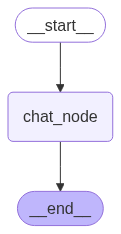

In [28]:
chatbot

In [32]:
thread_id = '1'
while True:
    user_message = input("Type here")

    print('User: ', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    config = {'configurable':{'thread_id':thread_id}}
    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]}, config = config)

    print('AI: ', response['messages'][-1].content)

User:  hii my name is mudit
AI:  Hi Mudit! It's nice to meet you. 😊 

How are you doing today? Is there anything you'd like to chat about, or were you just saying hello?
User:  Can you tell me my name
AI:  Your name is Mudit! 😊 

I just wanted to confirm that I understood correctly. 

Is that right?
User:  yes you are right
AI:  Great! Glad we got that sorted out. 😊 

What’s on your mind, Mudit?
User:  can you provide me roadmap of Mlops
AI:  Okay, let’s create a roadmap for MLOps – it’s a constantly evolving field, so this is a high-level overview. We’ll break it down into stages and key areas.

**Phase 1: Foundations - Getting Started (1-3 Months)**

* **Understanding the Basics:**
    * **What is MLOps?** (DevOps for Machine Learning) – Focus on automation, collaboration, and reliability in the ML lifecycle.
    * **Key Concepts:** Model Training, Model Deployment, Model Monitoring, Data Versioning, Experiment Tracking.
    * **Popular Tools:**  Version control (Git), Experiment Tra

In [33]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hii my name is mudit', additional_kwargs={}, response_metadata={}, id='2b18dc94-f830-4c82-9dda-44e4ed8ce1a6'), AIMessage(content="Hi Mudit! It's nice to meet you. 😊 \n\nHow are you doing today? Is there anything you'd like to chat about, or were you just saying hello?", additional_kwargs={}, response_metadata={'model': 'gemma3:4b', 'created_at': '2025-08-12T17:25:48.4622705Z', 'done': True, 'done_reason': 'stop', 'total_duration': 30268747900, 'load_duration': 19390144900, 'prompt_eval_count': 15, 'prompt_eval_duration': 1090918600, 'eval_count': 40, 'eval_duration': 9739691900, 'model_name': 'gemma3:4b'}, id='run--f4c96926-d3b5-484b-b636-47b63ea9f9b2-0', usage_metadata={'input_tokens': 15, 'output_tokens': 40, 'total_tokens': 55}), HumanMessage(content='Can you tell me my name', additional_kwargs={}, response_metadata={}, id='224f9209-fccd-47a3-b245-a93a83550d57'), AIMessage(content='Your name is Mudit! 😊 \n\nI just wanted to co